In [ ]:
import numpy as np
import os
from keras.models import load_model
from sklearn.model_selection import KFold
from time import time
from timeit import default_timer as timer
import pickle
import gzip


cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))


In [13]:
f = gzip.GzipFile('all_dataset_window19Middle.npy.gz', "r")
dataset = np.load(f)
print(dataset.shape)

(1133502, 19, 50)


In [14]:
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state=111)
print(dataset.shape)
print(dataset[0,:2,:])

(1133502, 19, 50)
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.99043465
  0.02297737 0.2158528  0.77729988 0.02412702 0.19309869 0.08706578
  0.01964677 0.22270013 0.0511737  0.04148712 0.12346705 0.03768789
  0.38936076 0.86875552 0.82200629 0.1665886  0.04565117 0.00364771
  0.5        0.11204704]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.33403307
  0.94479948 0.00151625 0.00482072 0.55477923 0.00196558 0.00910306
  0.90114391 0.00436397 0.98507971 0.97916371 0.00477298 0.00290041
 

In [40]:

def get_models_output(path):

    indices = pickle.load( open( path + "/model_kfold_indexes", "rb" ) )
    n = dataset.shape[0]
    hist = np.array([])
    
    for i in range(1,11):    
        
        
        l = indices[i][0]
        r = indices[i][1]
        print(l, " ", r)
        m =  load_model( path + "/model_kfold" + str(i) + ".h5")
        res = m.predict(np.concatenate((dataset[0:l], dataset[r:n]), axis=0)[:,:,:21])
        print(res.shape)
        
        hist = np.concatenate((hist, res.flatten()), axis=0 )
        print(hist.shape)
        
    return hist    

In [41]:
hist = get_models_output("kfold-1hotQ8")

0   113350
(1020152, 8)
(8161216,)
113350   226700
(1020152, 8)
(16322432,)
226700   340050
(1020152, 8)
(24483648,)
340050   453400
(1020152, 8)
(32644864,)
453400   566750
(1020152, 8)
(40806080,)
566750   680100
(1020152, 8)
(48967296,)
680100   793450
(1020152, 8)
(57128512,)
793450   906800
(1020152, 8)
(65289728,)
906800   1020150
(1020152, 8)
(73450944,)
1020150   1133500
(1020152, 8)
(81612160,)


In [42]:
print(hist.shape)
print(dataset.shape)

(81612160,)
(1133502, 19, 50)


In [43]:
import pickle
with open('q8_histogram', 'wb') as file_pi:
        pickle.dump(hist, file_pi)

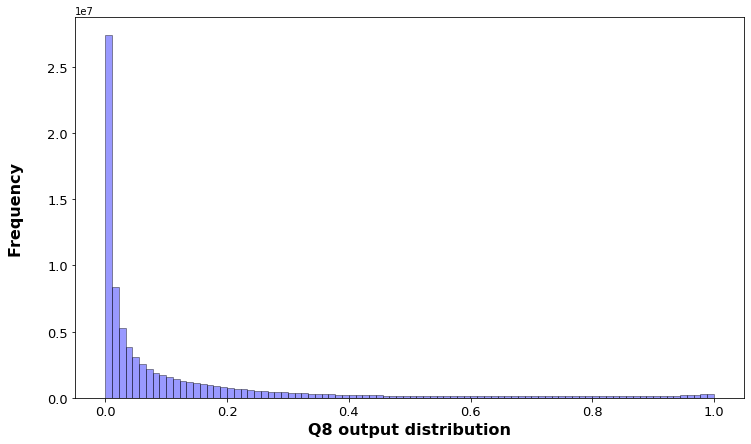

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
ax0 = plt.gca()

# seaborn histogram
sns.distplot(hist, hist=True, kde=False,  bins=int(180/2), color = 'blue', hist_kws={'edgecolor':'black'}, ax = ax0)


ax0.set_ylabel("Frequency", fontsize=16, labelpad=25, weight='bold')
ax0.set_xlabel("Q8 output distribution",  fontsize=16, weight='bold')


ax0.tick_params(labelsize=13)

plt.savefig("histogram", bbox_inches = 'tight')